In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns = ['Serial No.'],inplace=True)

In [5]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [7]:
df.shape

(500, 8)

In [8]:
for i in df.columns:
    if df[i].isna().sum()>0:
        if df[i].dtypes=='float64':
            df[i].fillna(df[i].median(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [9]:
df['GRE Score'].fillna(df['GRE Score'].median(),inplace=True)

In [10]:
df['TOEFL Score'].fillna(df['TOEFL Score'].median(),inplace=True)

In [11]:
df['University Rating'].mode()

0    3.0
dtype: float64

In [12]:
df['University Rating'].mode()[0]

3.0

In [13]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [14]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

check if the data is following the assumptions of the Linear regression : so that we can decide to apply linear regresssion on it

1. check for normal distribution

In [15]:
from scipy import stats as st

In [16]:
import pylab

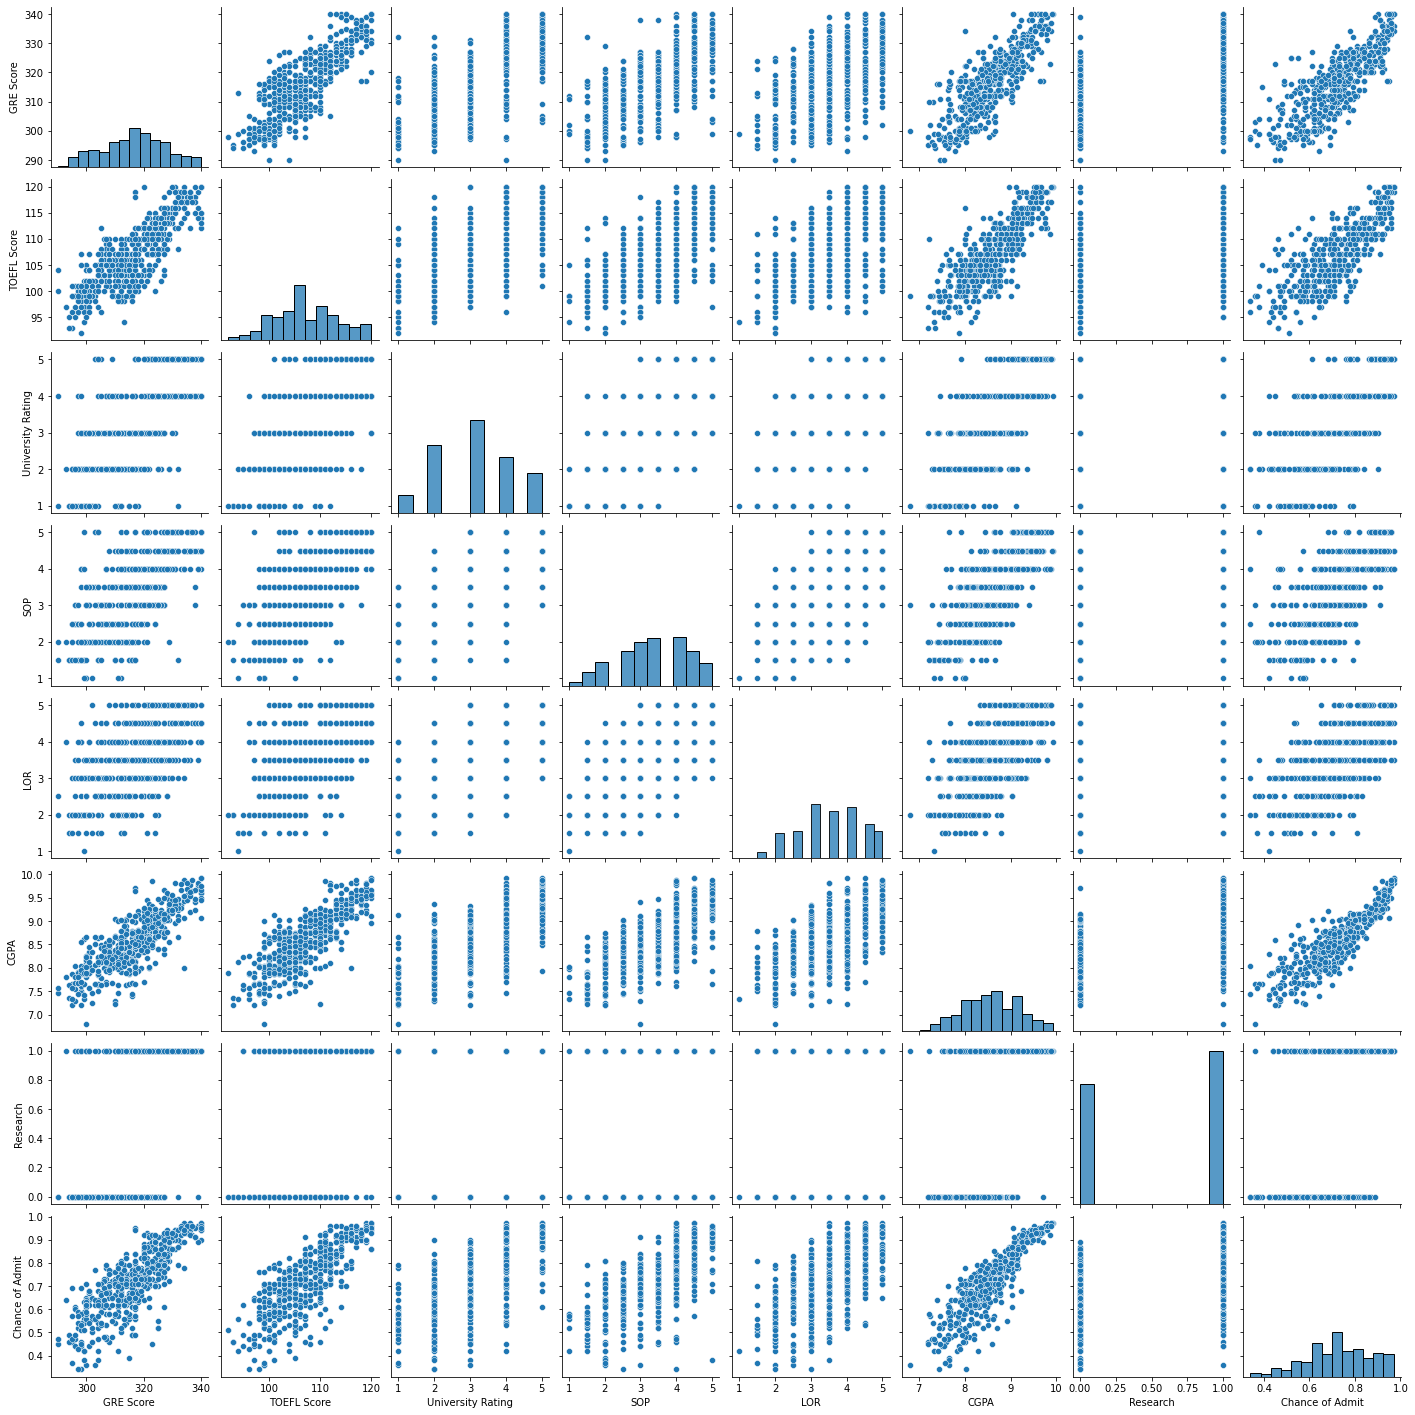

In [17]:
sns.pairplot(df)

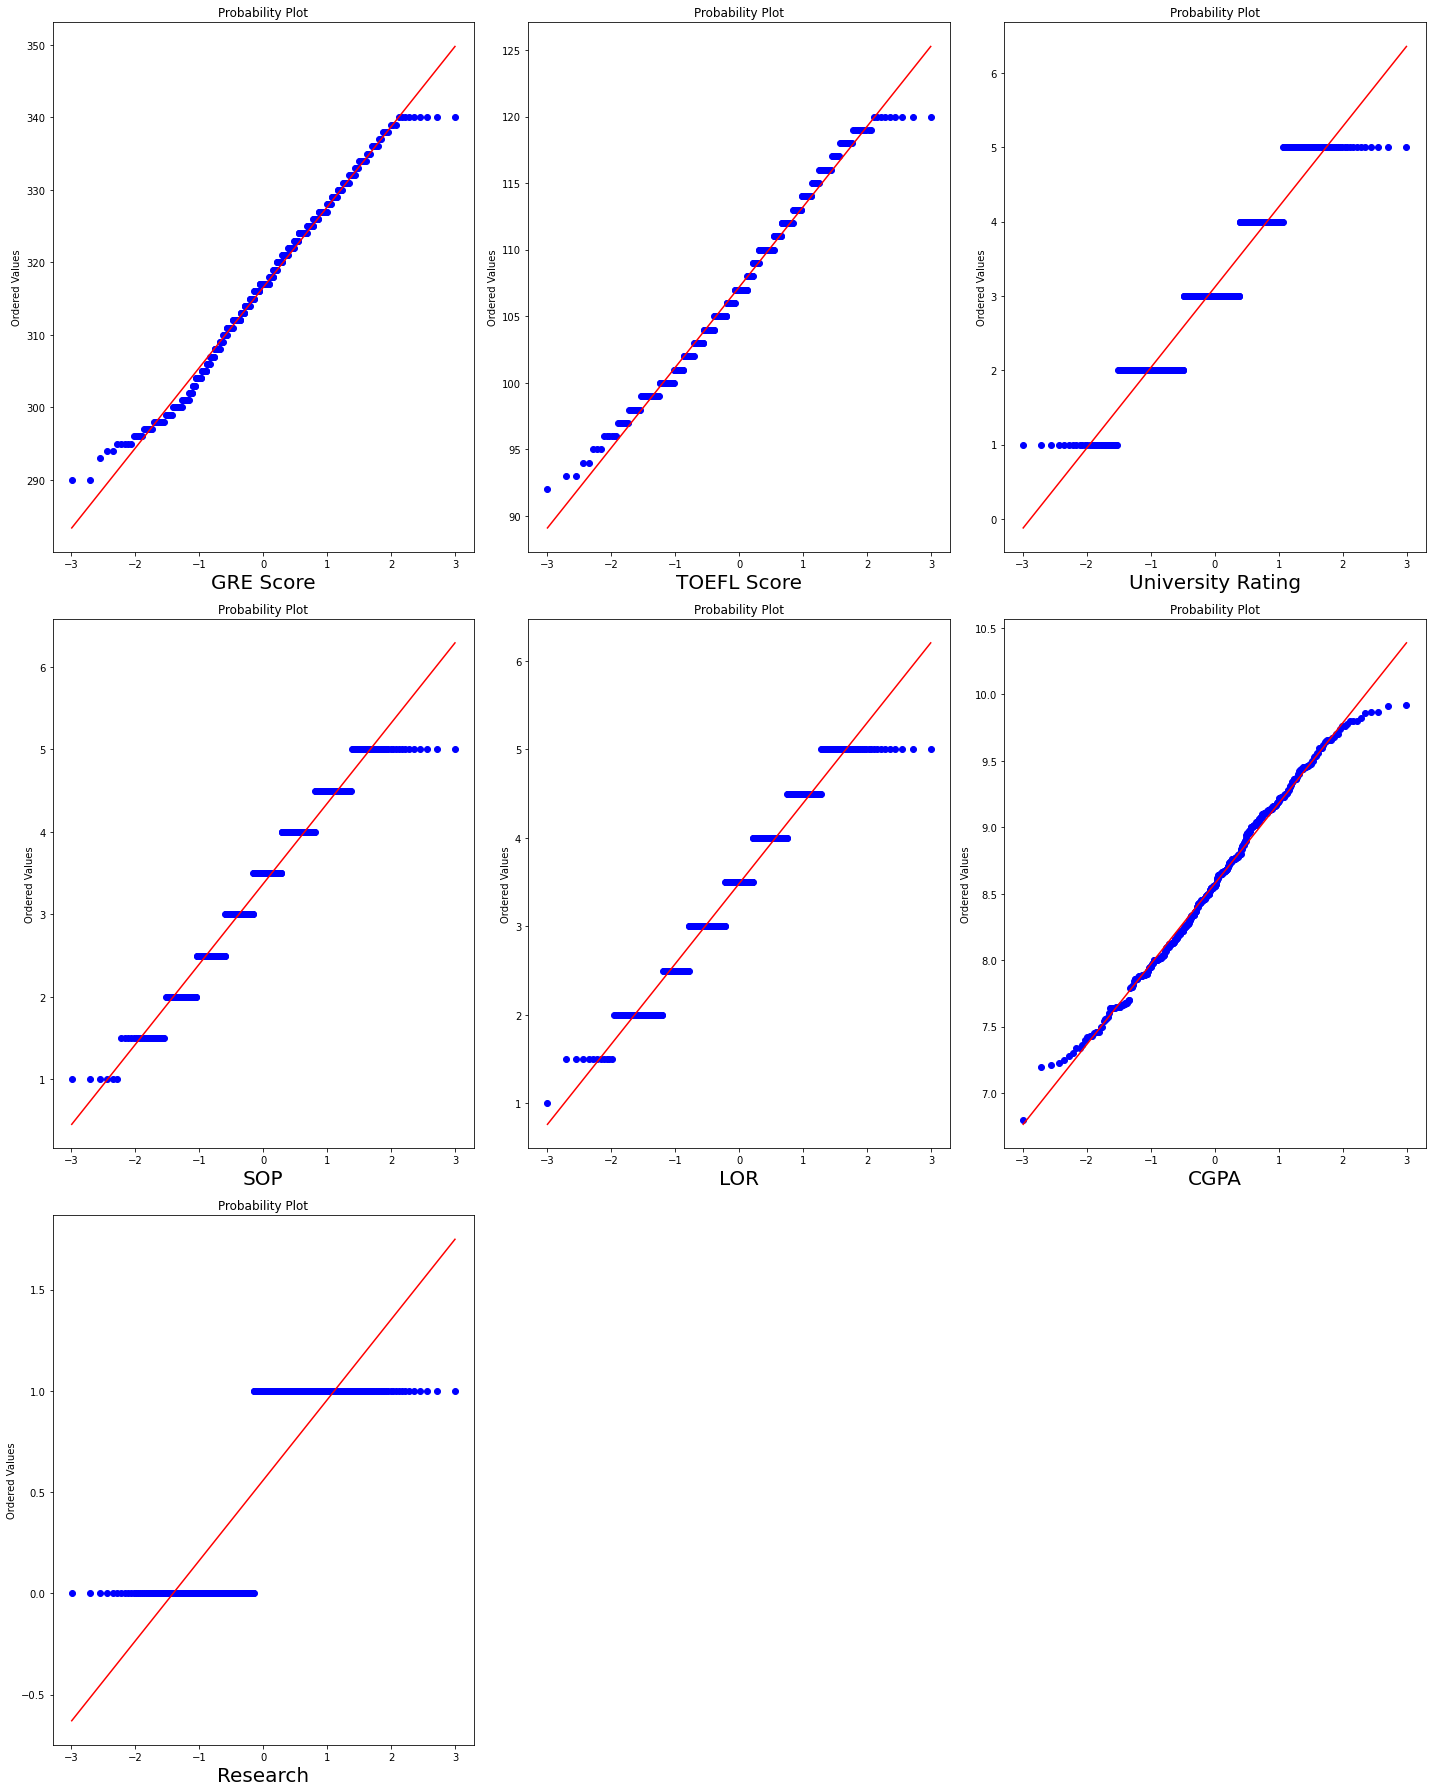

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=7 :
        ax = plt.subplot(3,3,plotnumber)
        st.probplot(df[column],dist = "norm",plot = pylab)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [19]:
df.skew() # range is between +-0.3 for nornal distribution tolerance

GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

2. Multicollinear
3. Target co-related

<AxesSubplot:>

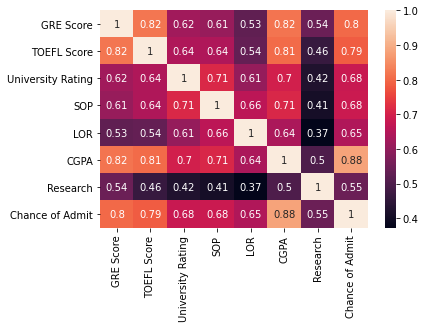

In [20]:
x = df.corr(method = 'pearson')
sns.heatmap(x,annot = True)

In [21]:
X=df.drop(columns=['Chance of Admit'])
Y=df['Chance of Admit']

In [22]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [23]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.20,random_state = 120)

In [26]:
x_train.shape

(400, 7)

In [27]:
x_test.shape

(100, 7)

In [28]:
y_train.shape

(400,)

In [29]:
y_test.shape

(100,)

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.intercept_

-1.2843016615461327

In [32]:
lr.coef_

array([0.00189727, 0.00253558, 0.00564356, 0.00240518, 0.01529286,
       0.12168918, 0.02278335])

In [33]:
y_pred = lr.predict(x_test)

In [34]:
y_pred

array([0.72488031, 0.70331147, 0.76051143, 0.64773312, 0.67306757,
       0.68555365, 0.62452874, 0.53913699, 0.84419651, 0.72149045,
       0.81266231, 0.8138742 , 0.65927199, 0.86202552, 0.69979236,
       0.50831945, 0.82491291, 0.56690895, 0.95493591, 0.53503182,
       0.741139  , 0.86189417, 0.88556975, 0.66135794, 0.73715459,
       0.80776472, 0.67493374, 0.87964657, 0.95732097, 0.65614933,
       0.72978089, 0.61189638, 0.77125541, 0.77046635, 0.84880397,
       0.78077769, 0.82278888, 0.62615412, 0.60274305, 0.77402953,
       0.56448484, 0.79093086, 0.8365031 , 0.61105256, 0.70001207,
       0.66414751, 0.57081826, 0.76120218, 0.86184591, 0.94770548,
       0.83224381, 0.74894362, 0.71990594, 0.70644387, 0.52549286,
       0.8322867 , 0.73395195, 0.85372648, 0.68561199, 0.73148983,
       1.00162301, 0.78759002, 0.61284177, 0.92766986, 0.8507034 ,
       0.88666255, 0.84987946, 0.73302878, 0.65453768, 0.72011466,
       0.82601118, 0.64154275, 0.64326627, 0.64789772, 0.54626

In [35]:
y_test

428    0.69
498    0.73
364    0.77
207    0.66
204    0.69
       ... 
294    0.61
275    0.78
1      0.76
18     0.63
463    0.57
Name: Chance of Admit, Length: 100, dtype: float64

In [36]:
len(y_pred)

100

In [37]:
y_pred[0]

0.724880309502645

In [38]:
y_test.iloc[0]

0.69

In [39]:
mse = mean_squared_error(y_test,y_pred)
mse

0.003312886031514512

In [40]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.037757422710854624

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2 = r2_score(y_test,y_pred)
r2

0.8039353922394976

In [43]:
import math

In [44]:
rmse = math.sqrt(mse)
rmse

0.05755767569590099

# ********************************

In [45]:
lr.intercept_

-1.2843016615461327

In [46]:
lr.coef_

array([0.00189727, 0.00253558, 0.00564356, 0.00240518, 0.01529286,
       0.12168918, 0.02278335])

In [48]:
from sklearn.preprocessing import StandardScaler

In [57]:
std = StandardScaler()
x_scaled = std.fit_transform(X)

In [58]:
vif = pd.DataFrame()

In [59]:
len(X.columns)

7

In [60]:
variables = x_scaled
variables.shape[1]

7

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split

In [61]:
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [62]:
vif

,VIF
0,4.154712
1,3.795794
2,2.517273
3,2.776399
4,2.037378
5,4.653172
6,1.458962


In [65]:
vif['Features'] = X.columns

In [66]:
vif

,VIF,Features
0,4.154712,GRE Score
1,3.795794,TOEFL Score
2,2.517273,University Rating
3,2.776399,SOP
4,2.037378,LOR
5,4.653172,CGPA
6,1.458962,Research


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size = 0.20,random_state = 123)

In [71]:
x_train.shape

(400, 7)

In [72]:
x_test.shape

(100, 7)

In [73]:
y_train.shape

(400,)

In [74]:
y_test.shape

(100,)

In [75]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [76]:
lr1.coef_

array([0.02318986, 0.0188088 , 0.00186886, 0.00120479, 0.0137315 ,
       0.07330447, 0.01305188])

In [77]:
lr1.intercept_

0.7218646674579712

In [78]:
y_pred1 = lr1.predict(x_test)
y_pred1

array([0.8072533 , 0.93536076, 0.53092607, 0.62209572, 0.81995684,
       0.70108507, 0.87576041, 0.77881907, 0.62033349, 0.88277391,
       0.90368017, 0.76516142, 0.9534223 , 0.5857042 , 0.72317875,
       0.83580722, 0.51799891, 0.7676637 , 0.9408666 , 0.61832288,
       0.57520499, 0.75012435, 0.85265313, 0.69024621, 0.83399476,
       0.65271582, 0.57992229, 0.62648134, 0.97552063, 0.87925791,
       0.53229348, 0.71074838, 0.65730785, 0.68951802, 0.47317654,
       0.85144945, 0.85598383, 0.76825526, 0.93934199, 0.61308947,
       0.63565805, 0.71874412, 0.66472146, 0.90959884, 0.80711537,
       0.72220683, 0.64677272, 0.67589626, 0.96337493, 0.84762766,
       0.7575147 , 0.59911897, 0.64251604, 0.69241981, 0.55410511,
       0.54524581, 0.68725625, 0.50935691, 0.58711681, 0.6860309 ,
       0.88206518, 0.84505062, 0.78276565, 0.53598055, 0.6220349 ,
       0.90608676, 0.88816004, 0.83610797, 0.83438362, 0.88770361,
       0.6368749 , 0.75598678, 0.62530589, 0.83653431, 0.55729

In [79]:
r2_score(y_test,y_pred1)

0.779107210310312

In [82]:
mse1 = mse(y_test,y_pred1)

In [83]:
mse1

0.004332986575067085

In [85]:
np.sqrt(mse1)

0.06582542498964275